In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [175]:
# Dataset

df=pd.read_csv("car_fuel_efficiency.csv")

In [176]:
# Prepare the dataset

required_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[[col for col in required_cols if col in df.columns]]


In [177]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


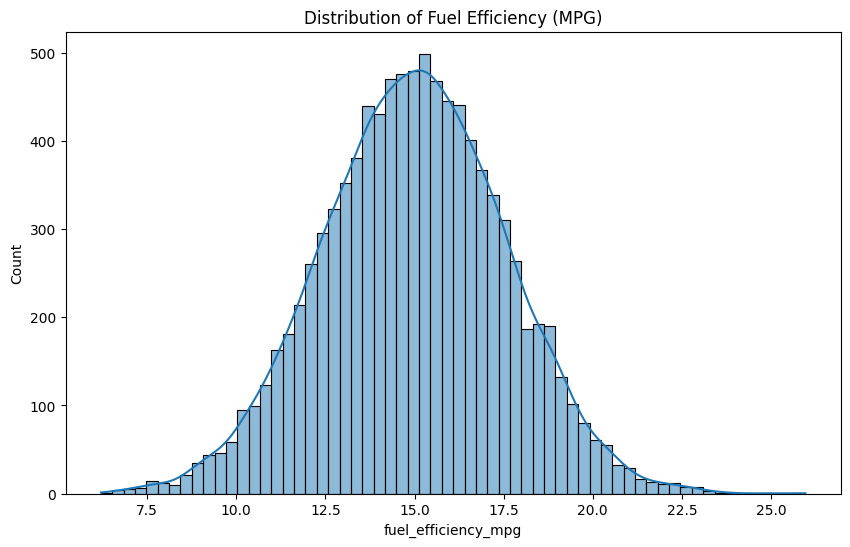

In [178]:
# EDA: No it does not have a long tail

plt.figure(figsize=(10, 6))
sns.histplot(df['fuel_efficiency_mpg'], kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')

plt.show()

In [179]:
skew_value = df['fuel_efficiency_mpg'].skew()
print(f"Skewness: {skew_value:.2f}")



# Answer to the Question : NO it does not have a long tail rather is normally distributed

Skewness: -0.01


In [180]:
# Question 1
# There's one column with missing values. What is it?

df.isnull().sum()




engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [181]:
# Question 2
# What's the median (50% percentile) for variable 'horsepower'?

median_hp = df['horsepower'].median()
print(median_hp)


149.0


In [182]:
# Prepare and split the dataset
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.

np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [183]:
print(f"Train set: {df_train.shape} samples")
print(f"Validation set: {df_val.shape} samples")
print(f"Test set: {df_test.shape} samples")

Train set: (5824, 5) samples
Validation set: (1940, 5) samples
Test set: (1940, 5) samples


In [184]:
# Question 3
# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a/ linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to ev/aluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?

In [185]:
# Apply log1p transformation to the target variable
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val   = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test  = np.log1p(df_test.fuel_efficiency_mpg.values)

# Remove the target column from the feature sets
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [186]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [187]:
# --- settings: features & target (adjust if names differ) ---
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

In [188]:
# df_train['horsepower'] = df_train['horsepower'].fillna(0)
# df_val['horsepower']   = df_val['horsepower'].fillna(0)


In [189]:
def prepare_X_0(df):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [190]:

X_train = prepare_X_0(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [191]:
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [192]:
y_pred = w_0 + X_train.dot(w)

In [193]:

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [194]:
round(rmse(y_train, y_pred),2)

np.float64(0.04)

In [195]:
X_val = prepare_X_0(df_val)
y_pred = w_0 + X_val.dot(w)

In [196]:
round(rmse(y_val, y_pred),2)

np.float64(0.04)

In [197]:
def prepare_X_mean(df):
    mean_hp = df['horsepower'].mean()
    df['horsepower'] = df['horsepower'].fillna(mean_hp)
    X = df.values
    return X

In [198]:

X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [199]:
y_pred = w_0 + X_train.dot(w)

In [200]:

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [201]:
round(rmse(y_train, y_pred),2)

np.float64(0.04)

In [202]:
X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)

In [203]:
round(rmse(y_val, y_pred),2)

np.float64(0.04)

In [204]:
# Which option gives better RMSE? Both options give same RMSE

In [205]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [206]:
# Question 4



# 1️⃣ Prepare the data
def prepare_X(df):
    df_num = df[features].fillna(0)  # Fill missing values with 0
    X = df_num.values
    return X

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

# 2️⃣ Try different regularization values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
scores = []

for r in r_values:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # Predict on validation set
    y_pred = w_0 + X_val.dot(w)

    # Compute RMSE
    score = rmse(y_val, y_pred)
    score_rounded = round(score, 2)

    scores.append((r, score_rounded))
    print(f"r={r}, RMSE={score_rounded}")

# 3️⃣ Find best r
best_r, best_rmse = min(scores, key=lambda x: (x[1], x[0]))
print(f"\nBest r: {best_r}, Best RMSE: {best_rmse}")


r=0, RMSE=0.04
r=0.01, RMSE=0.04
r=0.1, RMSE=0.04
r=1, RMSE=0.04
r=5, RMSE=0.04
r=10, RMSE=0.04
r=100, RMSE=0.04

Best r: 0, Best RMSE: 0.04


In [207]:
# Best r: 0, Best RMSE: 0.04

In [208]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


In [ ]:
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_scores = []

for seed in seeds:
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    # Fill missing values with 0
    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)
    
    # Prepare X and y
    X_train = df_train.drop(columns=['fuel_efficiency_mpg']).values
    y_train = df_train['fuel_efficiency_mpg'].values
    
    X_val = df_val.drop(columns=['fuel_efficiency_mpg']).values
    y_val = df_val['fuel_efficiency_mpg'].values
    
    # Train model without regularization
    w_0, w = train_linear_regression(X_train, y_train)

    # Predict on validation set
    y_pred = w_0 + X_val.dot(w)

    # Compute RMSE
    rmse_score = rmse(y_val, y_pred)

    # ✅ Append RMSE to list
    rmse_scores.append(rmse_score)

# ✅ Now compute standard deviation after the loop
std_rmse = np.std(rmse_scores)
std_rmse_rounded = round(std_rmse, 3)

print("RMSE Scores:", rmse_scores)
print("Standard Deviation of RMSE:", std_rmse_rounded)


RMSE Scores: [np.float64(0.5206531296297207), np.float64(0.5213388912866506), np.float64(0.5228069974913666), np.float64(0.5159516741255491), np.float64(0.5109129460116937), np.float64(0.5283406460212935), np.float64(0.5313910658190373), np.float64(0.509067038739038), np.float64(0.5147399129482789), np.float64(0.513186590829269)]
Standard Deviation of RMSE: 0.006989446427824928


In [210]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9066,240,136.0,4050.512290,2006,10.304700
3073,190,141.0,3195.866942,2017,13.479434
2476,200,184.0,3006.164370,2017,16.190653
658,200,0.0,2947.143980,2022,15.446503
954,250,132.0,3114.371978,2001,14.472172


In [214]:
# Step 1: Split with seed=9
np.random.seed(9)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Step 2: Combine train and validation sets
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

# Step 3: Fill missing values with 0
df_full_train = df_full_train.fillna(0)
df_test = df_test.fillna(0)

# Step 4: Prepare X and y
X_full_train = df_full_train.drop(columns=['fuel_efficiency_mpg']).values
y_full_train = df_full_train['fuel_efficiency_mpg'].values

X_test = df_test.drop(columns=['fuel_efficiency_mpg']).values
y_test = df_test['fuel_efficiency_mpg'].values

# Step 5: Train model with r = 0.001
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Step 6: Predict on test dataset
y_pred = w_0 + X_test.dot(w)

# Step 7: Compute RMSE
rmse_test = rmse(y_test, y_pred)
rmse_rounded = round(rmse_test, 4)

print("Test RMSE:", rmse_rounded)


Test RMSE: 0.5156


In [212]:
df_train.shape ,df_val.shape ,df_test.shape

((5824, 5), (1940, 5), (1940, 5))